In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from scipy import stats


In [2]:
raw_data = pd.read_csv('data.csv', header=None)

In [3]:
data = raw_data.values.reshape(-1)
data.shape

(138,)

In [4]:
data

array(['8:56 AM', '9:00 AM', '7:45 AM', '7:45 AM', '8:05 AM', '7:45 AM',
       '8:40 AM', '8:40 AM', '8:30 AM', '8:30 AM', '8:45 AM', '8:20 AM',
       '8:45 AM', '8:20 AM', '8:05 AM', '8:00 AM', '8:05 AM', '8:00 AM',
       '8:40 AM', '8:40 AM', '8:40 AM', '8:25 AM', '8:40 AM', '8:40 AM',
       '8:55 AM', '8:50 AM', '8:55 AM', '8:10 AM', '8:15 AM', '8:05 AM',
       '8:45 AM', '8:45 AM', '8:45 AM', '8:40 AM', '8:30 AM', '8:40 AM',
       '8:45 AM', '8:54 AM', '8:38 AM', '8:40 AM', '8:32 AM', '8:41 AM',
       'absent', '11:00 AM', '8:35 AM', '8:15 AM', '8:10 AM', '8:10 AM',
       '8:39 AM', '8:13 AM', '8:15 AM', '8:12 AM', '8:10 AM', '8:00 AM',
       '9:00 AM', '8:50 AM', '8:50 AM', '8:50 AM', '8:40 AM', '8:45 AM',
       '8:40 AM', '8:50 AM', '8:40 AM', '8:34 AM', '8:20 AM', '8:30 AM',
       '8:15 AM', '8:30 AM', '8:13 AM', '8:30 AM', '7:45 AM', '8:40 AM',
       '8:45 AM', '8:55 AM', '8:45 AM', '8:45 AM', '8:00 AM', '8:45 AM',
       '8:45 AM', '8:45 AM', '8:05 AM', '8:00 AM', 

In [5]:
#Miles' answer for converting timestamps to minutes before 9 AM and ignoring strings. 
def convert_time_to_minutes(time_text: str) -> int:
    """Converts time formatted as 'H:MM AM' to minutes before/after 9:00 AM"""
    try:
        time_delta = pd.Timestamp(time_text) - pd.Timestamp("9:00 am")
        return int(time_delta.total_seconds() / 60)
    except ValueError:
        return None

In [6]:
minutes_early_or_late = [convert_time_to_minutes(time_text) for time_text in data]

In [7]:
y = [value for value in minutes_early_or_late if value is not None]  # drop missing/None values

In [8]:
"""Tara wants to make an array to look at"""
minutes_array = np.array(y)

In [9]:
minutes_array

array([ -4,   0, -75, -75, -55, -75, -20, -20, -30, -30, -15, -40, -15,
       -40, -55, -60, -55, -60, -20, -20, -20, -35, -20, -20,  -5, -10,
        -5, -50, -45, -55, -15, -15, -15, -20, -30, -20, -15,  -6, -22,
       -20, -28, -19, 120, -25, -45, -50, -50, -21, -47, -45, -48, -50,
       -60,   0, -10, -10, -10, -20, -15, -20, -10, -20, -26, -40, -30,
       -45, -30, -47, -30, -75, -20, -15,  -5, -15, -15, -60, -15, -15,
       -15, -55, -60, -60, -60, -15, -15,   0,   0, -10,   0, -45, -20,
       -35, -30, -90, -35, -15, -20, -15,  -5, -15, -15, -15,   0,   0,
         0,   0,   0, -10, -10,  -3, -18, -25, -30, -45,   0, -25,   0,
        -2, -40, -15, -25, -33, -14, -29, -23, -15, -15,   0,  -3,  -3,
       -10, -15, -10, -30, -15, -10, -50])

In [10]:
np.mean(minutes_array)

-24.386861313868614

In [11]:
np.std(minutes_array)

23.386392005278662

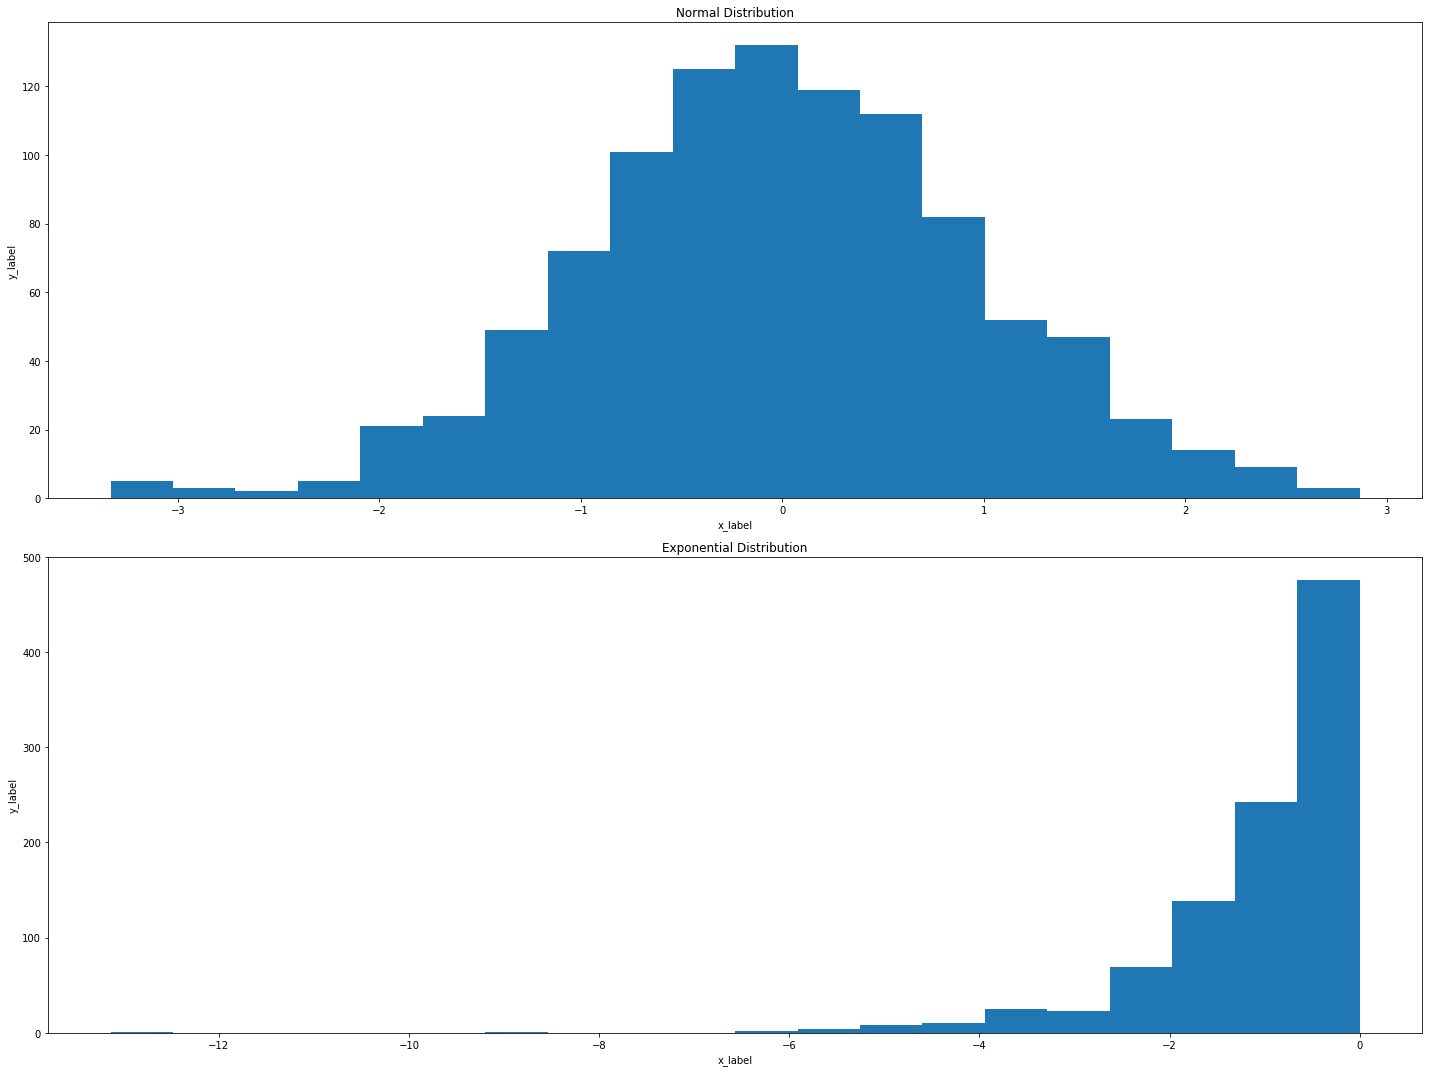

In [12]:
from scipy import stats

# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(20, 15))

# Create some fake data with a normal distribution
normal_dist = stats.norm(loc=0, scale=1)
fake_y1 = normal_dist.rvs(1000)  

# Plot the data from the normal distribution
ax = axs[0]
ax.hist(fake_y1, bins=20)  # Let's try something in between
ax.set_xlabel("x_label")
ax.set_ylabel("y_label")
ax.set_title("Normal Distribution")

# Create some fake data with an exponential distribution
exponential_dist = stats.expon(loc=0, scale=1)
fake_y2 = -exponential_dist.rvs(1000)  

# Plot the data from the exponential distribution
ax = axs[1]
ax.hist(fake_y2, bins=20)  # Let's try something in between
ax.set_xlabel("x_label")
ax.set_ylabel("y_label")
ax.set_title("Exponential Distribution")

# Same number of data points
# exponential_dist = stats.expon(loc= 24, scale= 20)
# fake_y3 = -exponential_dist.rvs(137)  

# # Plot the data from the exponential distribution
# ax = axs[2]
# ax.hist(fake_y3, bins=20)  # Let's try something in between
# ax.set_xlabel("Minutes from Late")
# ax.set_ylabel("Attendant days")
# ax.set_title("Adapted Exponential Distribution")

# #Blend exponential and normal dist
# exponential_dist = stats.expon(loc= 24, scale= 20)
# fake_y4 = -exponential_dist.rvs(137) + normal_dist.rvs(137)
# ax = axs[3]
# ax.hist(fake_y4, bins=20)  # Let's try something in between
# ax.set_xlabel("Minutes from Late")
# ax.set_ylabel("Attendant days")
# ax.set_title("Adapted Exponential/Normal Distribution")

# Show the plots
plt.tight_layout()
plt.show()


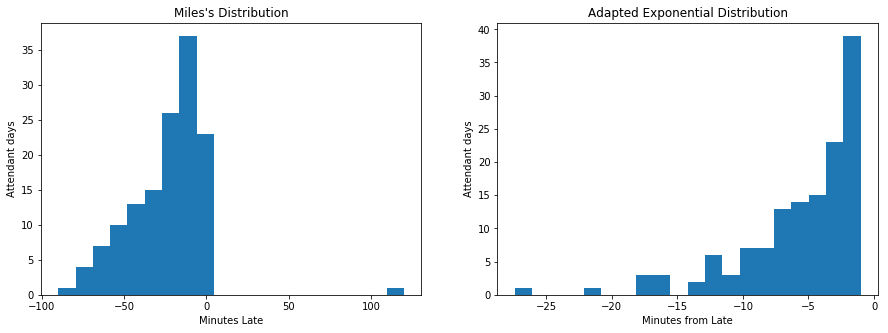

In [103]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Original plot
ax = axs[0]
ax.hist(y, bins=20)  # Let's try something in between
ax.set_xlabel("Minutes Late")
ax.set_ylabel("Attendant days")
ax.set_title("Miles's Distribution")

# Same number of data points
exponential_dist = stats.expon(loc= 1, scale= 5)
fake_y3 = -exponential_dist.rvs(137)
# Plot the data from the exponential distribution
ax = axs[1]
ax.hist(fake_y3, bins=20)  # Let's try something in between
ax.set_xlabel("Minutes from Late")
ax.set_ylabel("Attendant days")
ax.set_title("Adapted Exponential Distribution")

plt.show()


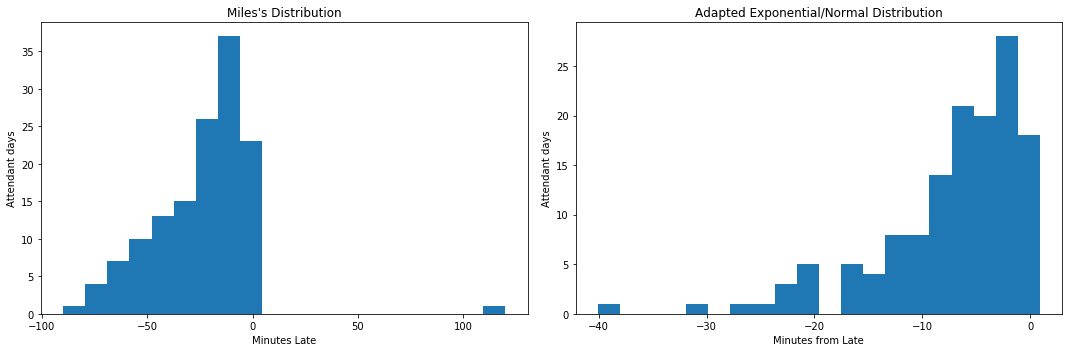

In [178]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Original plot
ax = axs[0]
ax.hist(y, bins=20)  # Let's try something in between
ax.set_xlabel("Minutes Late")
ax.set_ylabel("Attendant days")
ax.set_title("Miles's Distribution")

#Blend exponential and normal dist
ax = axs[1]
exponential_dist1 = stats.expon(loc = -1, scale= 6)
normal_dist1 = stats.norm(loc= -2, scale = 2)
fake_y4 = -exponential_dist1.rvs(138) + normal_dist1.rvs(138) 
ax.hist(fake_y4, bins=20)  # Let's try something in between
ax.set_xlabel("Minutes from Late")
ax.set_ylabel("Attendant days")
ax.set_title("Adapted Exponential/Normal Distribution")

# Show the plots
plt.tight_layout()
plt.show()


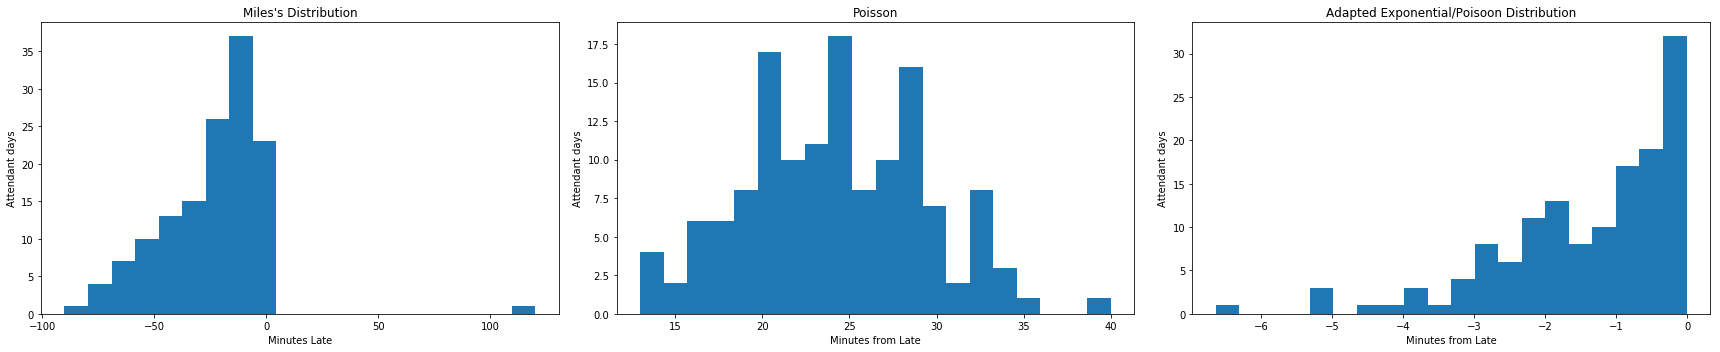

In [237]:
#Let's try a Poisson distribution
from scipy.stats import poisson
fig, axs = plt.subplots(1, 3, figsize=(24, 5))

# Original plot
ax = axs[0]
ax.hist(y, bins=20)  # Let's try something in between
ax.set_xlabel("Minutes Late")
ax.set_ylabel("Attendant days")
ax.set_title("Miles's Distribution")


ax = axs[1]
fake_y5 = poisson.rvs(mu = 24, size=138)
ax.hist(fake_y5, bins=20)
ax.set_xlabel("Minutes from Late")
ax.set_ylabel("Attendant days")
ax.set_title("Poisson")

ax = axs[2]
exponential_dist1 = stats.expon(loc = 0, scale= 1.5)
fake_y4 = -exponential_dist1.rvs(138) - poisson.pmf(138, mu = 1.7, loc = -2)
ax.hist(fake_y4, bins=20)  # Let's try something in between
ax.set_xlabel("Minutes from Late")
ax.set_ylabel("Attendant days")
ax.set_title("Adapted Exponential/Poisoon Distribution")


# Show the plots
plt.tight_layout()
plt.show()
